#### Resumen previo:
Tomo un dominio mas aplio, simetrico alrededor de $\rho=0$ tal que podamos ver que pasa en ese eje con las ecuaciones. Resuelvo mi problema original, solo que simetrico y una grilla de dimensiones mas pequeñas. 

Luego de ese note hay otro que debo separalo para tener un note mas pequeño, que trabaja sobre la idea del note "1DP1_3" pero en dos dimensiones. Ese no logro hacer que funcione aun
## Problema espejado en $\rho=0$ 
Aca busco resolver el problema  en un dominio $\Omega= [-L,L]\times[0,L]$
\begin{equation}
\partial_{\rho} ^2 f +\partial_z ^2 f+\frac{3}{\rho} \partial_{\rho} f =\Delta_{cil} f +\frac{2}{\rho}\partial_{\rho} f=-8\pi \alpha
\end{equation}

$$\int (\partial_{\rho} ^2 f +\partial_z ^2 f+\frac{3}{\rho} \partial_{\rho} f)v*\rho $$
Condiciones de borde $$\partial_{\rho} f |_{z=0}=0$$ $$(\pm \rho \partial_{\rho}f +z \partial_z f + f)|_{\rho=\pm L ,z=L}=0$$ Y para el factor conforme tenemos

\begin{equation}
\Delta \psi + \frac{2\pi \alpha \rho}{ \psi ^3}+\frac{| \partial f|^2 \rho^2}{4 \psi ^7 }=0=\frac{1}{\rho} \partial_{\rho}(\rho \partial_{\rho}\psi)+ \partial_z ^2 \psi+ \frac{2\pi \alpha \rho}{ \psi ^3}+\frac{| \partial f|^2 \rho^2}{4 \psi ^7 }
\end{equation}
Condiciones de borde $$\partial_{\rho} \psi |_{z=0}=0$$ $$\pm \rho \partial_{\rho}\psi+z \partial_z \psi +(\psi -1)|_{\rho=\pm L ,z=L}=0$$

La idea de simetrizar el problema a lo largo del eje $\psi=0$ es evitar y estudiar la cond de borde de Neuman Homogenea dada la simetria del problema. 

In [1]:
Atom = false
#Atom = true

false

In [2]:
using Gridap
using GridapODEs
if  !Atom 
    using GridapMakie, GLMakie
end
using FileIO
using GridapGmsh
using gmsh
using Gridap.CellData
using Gridap.Visualization
using Gridap.Arrays

In [3]:
model = GmshDiscreteModel("modelos/box1_resol.msh")

Info    : Reading 'modelos/box1_resol.msh'...
Info    : 13 entities
Info    : 374801 nodes
Info    : 749600 elements                                               
Info    : Done reading 'modelos/box1_resol.msh'                            


UnstructuredDiscreteModel()

In [4]:
Ω = Triangulation(model)
degree = 3
dΩ = Measure(Ω,degree)

Measure()

In [5]:
writevtk(Ω,"square")


(["square.vtu"],)

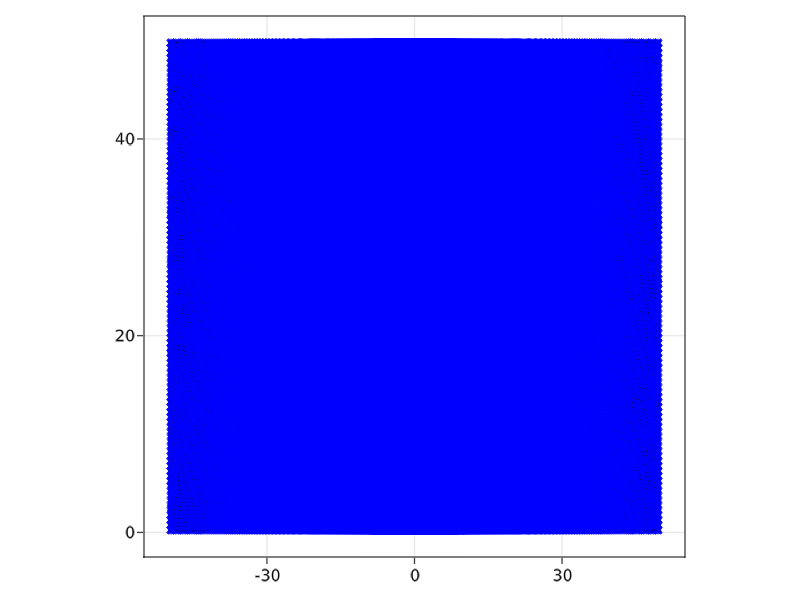

In [6]:
if Atom == false 
    fig, ax = plot(Ω)
    ax.aspect = AxisAspect(1) # this makes the region with fixed aspect, so it might not give the correct ratios
    wireframe!(Ω, color=:black, linewidth=1)
    scatter!(Ω, marker=:star8, markersize=4, color=:blue)
    fig
end 

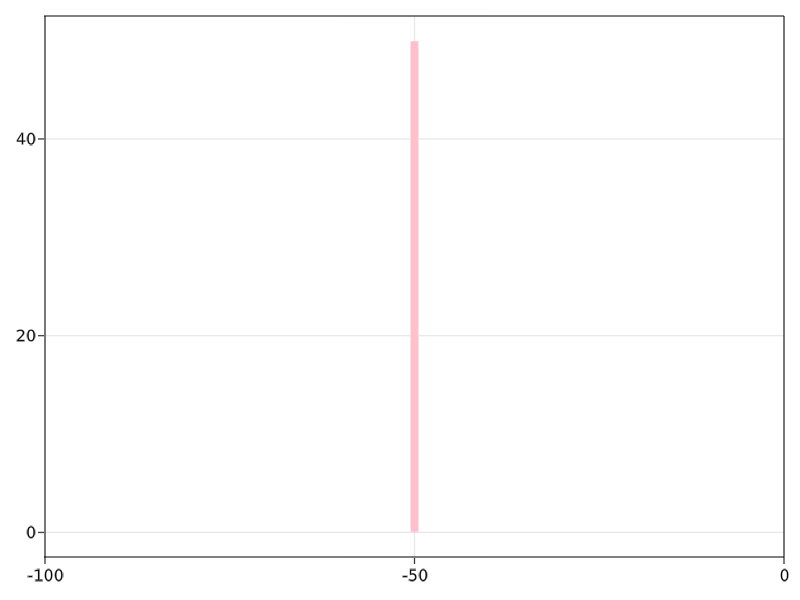

In [7]:
neumanntags_rhoI= ["extrhoficc"]
Γ_rhoI = BoundaryTriangulation(model,tags=neumanntags_rhoI)
dΓ_rhoI = Measure(Γ_rhoI,degree)
if Atom == false 
    fig = plot(Γ_rhoI, linewidth=8
    #, shading=true
    )
end


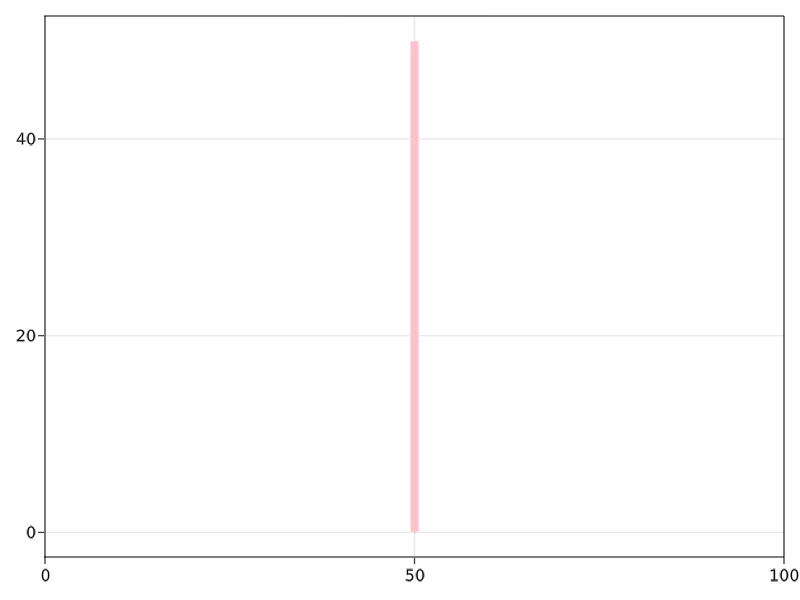

In [8]:
neumanntags_rho= [ "extrho"]
Γ_rho = BoundaryTriangulation(model,tags=neumanntags_rho)
dΓ_rho= Measure(Γ_rho,degree)
if Atom == false 
    fig = plot(Γ_rho, linewidth=8
    #, shading=true
      )
end


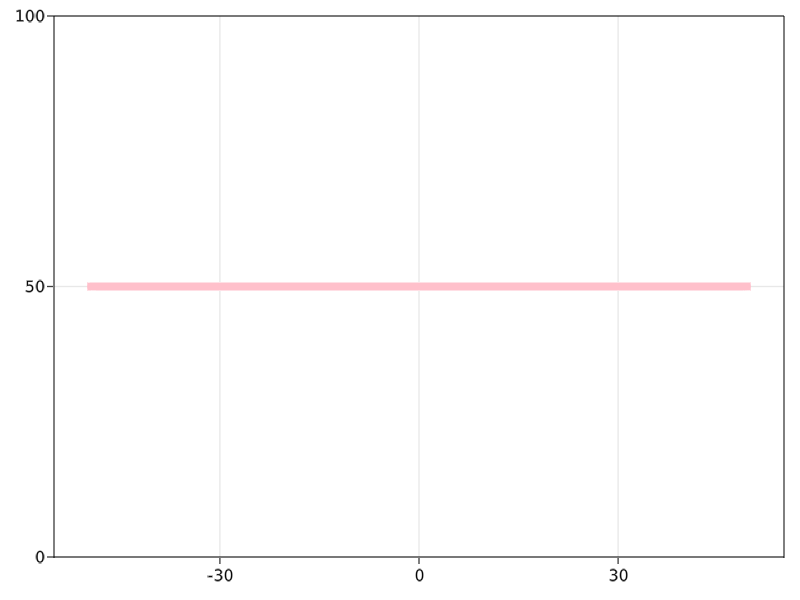

In [9]:
neumanntags_extz = [ "extz"]
Γ_extz = BoundaryTriangulation(model,tags=neumanntags_extz)
dΓ_extz = Measure(Γ_extz,degree)
if Atom == false 
    
    fig = plot(Γ_extz, linewidth=8
    #, shading=true
   )
end    


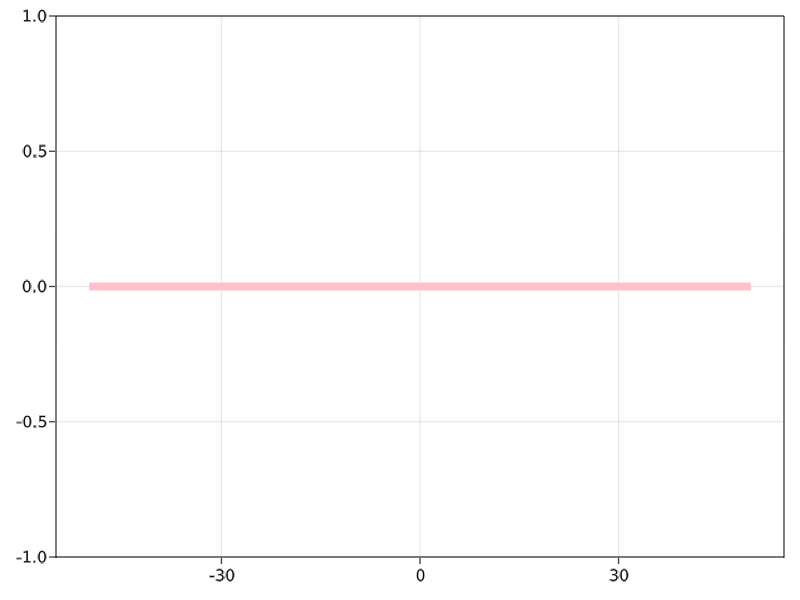

In [10]:
neumanntags_intz = [  "intz" ]
Γ_intz = BoundaryTriangulation(model,tags=neumanntags_intz)
dΓ_intz = Measure(Γ_intz,degree)
if Atom == false 
    fig = plot(Γ_intz, linewidth=8
    #, shading=true
   )
end   



In [11]:
order = 2
reffe = ReferenceFE(lagrangian,Float64,order)
V = TestFESpace(model,reffe,conformity=:H1)
U = TrialFESpace(V)

UnconstrainedFESpace()

## Función $f$

In [12]:
vacio = false

false

In [13]:
a0=0.01
R=30
Z=30

s(x) = sqrt((x[1]/ R)^2 + (x[2]/Z)^2) 
q(x)=1. - s(x) ^4 * (1. - 5. *(s(x) -1.) + 15. * (s(x)-1.)^2 - 35. *(s(x) -1.)^3 +70. * (s(x)- 1.)^4)

if vacio == false
    function α(x)
        if abs(s(x))  < 1.
            return  q(x)*a0
        end
        if abs(s(x)) >= 1.
           return  0.
        end
    end
end

if vacio == true
    function α(x)
        return  0.
    end    
end

t(x) = 8*π*α(x)

#Cond de Newman borde centro
c(x)=0.

c (generic function with 1 method)

$$\rho \partial_{\rho} f +z \partial_z f+ f=0$$
$$\rho * w * \partial_z f$$

In [14]:
writevtk(Ω,"resultados/A",cellfields=["α"=>α])

(["resultados/A.vtu"],)

In [15]:
d(x) = VectorValue(2. ,0)

d (generic function with 1 method)

In [16]:
ρ(x)=abs(x[1])
ρvec(x) = VectorValue(1.,0)
zvec(x) = VectorValue(0,1.)
z(x)=x[2]
sig(x)= sign(x[1])

sig (generic function with 1 method)

In [17]:
a(u,v) = ∫(- ∇(v) ⋅ ∇(u)*ρ +(d  ⋅ ∇(u))*sig*v  ) *dΩ + ∫( -v *( u +(zvec ⋅ ∇(u))*z) ) *dΓ_rho +∫( -v *( u +(zvec ⋅ ∇(u))*z)  ) *dΓ_rhoI +   ∫(- v *(u  *ρ /z +(ρvec ⋅ ∇(u))*sig*ρ *ρ/z) ) *dΓ_extz  
b(v) = ∫(-v * t* ρ) *dΩ - ∫(c * v* ρ ) *dΓ_intz 

b (generic function with 1 method)

In [18]:
op = AffineFEOperator(a,b,U,V)

AffineFEOperator()

In [19]:
ls = LUSolver()
solver = LinearFESolver(ls)

LinearFESolver()

In [21]:
uh= solve(solver,op)

SingleFieldFEFunction():
 num_cells: 745712
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 323661270536616189

In [23]:
f1=ρvec ⋅ ∇(uh)
f2=zvec ⋅ ∇(uh)
F=f2*f2 +f1*f1

OperationCellField():
 num_cells: 745712
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 323661270536616189

In [25]:
invrho3(x)=3. /x[1]

invrho3 (generic function with 1 method)

In [26]:
writevtk(Ω,"resultados/f",cellfields=["f"=>uh])
writevtk(Ω,"resultados/∇f",cellfields=["∇f"=>∇(uh)])
writevtk(Ω,"resultados/Laplaciano_f",cellfields=["Lap"=> Δ(uh)])
writevtk(Ω,"resultados/f1",cellfields=["f1"=>f1])
writevtk(Ω,"resultados/f1_por_3sobre_rho",cellfields=["3divrho*f1"=>invrho3 * f1])
writevtk(Ω,"resultados/residual_f",cellfields=["resi"=> Δ(uh)+invrho3*f1+t])
writevtk(Ω,"resultados/F",cellfields=["F"=> F])

(["resultados/F.vtu"],)

residual es
$$\partial_{\rho} ^2 f +\partial_z ^2 f+ \frac{3}{\rho} \partial_{\rho} f + 8 \pi a =0 = \Delta(f) + \frac{3}{\rho} \partial_{\rho} f + 8 \pi a $$

### Factor conforme

In [27]:
function t1(x)
  return 2. * π*α(x)
end

function t2(x)
  return 6. * π*α(x)
end

t2 (generic function with 1 method)

In [29]:
res(w,w2)=  ∫(  - (∇(w2) ⋅ ∇(w))*ρ  + t1 *( (w2*ρ * ρ)/(w*w*w)) + (0.25 * F *ρ *  ρ* ρ) * w2*(1/(w*w*w*w*w*w*w))  ) *dΩ #=+∫( -(( ρvec ⋅ ∇(w) )*sig +zvec ⋅∇(w)) * w2 *ρ ) *dΓ_intz  =#+ ∫(c * w2* ρ ) *dΓ_intz  +∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_rho + ∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_rhoI+   ∫( -w2 *( (w -1. )*ρ/z +(ρvec ⋅ ∇(w))*sig*ρ*ρ/z) ) *dΓ_extz

res (generic function with 1 method)

In [30]:
jac(w,dw,w2)= ∫(  - ( ∇(w2) ⋅ ∇(dw))*ρ   - ((dw* w2*ρ *  ρ)/(w*w*w*w))*t2   -(1.75 * F *ρ  * ρ* ρ) * dw *w2*(1/(w*w*w*w*w*w*w*w)) ) *dΩ #=+∫( -(( ρvec ⋅ ∇(dw) )*sig +zvec ⋅∇(dw)) * w2 *ρ ) *dΓ_intz + ∫(c * w2* ρ ) *dΓ_intz =#+∫( -w2 *( (dw#=- 1.=#) +(zvec ⋅ ∇(dw))*z) ) *dΓ_rhoI +∫(- w2 *( (dw#=- 1.=#) +(zvec ⋅ ∇(dw))*z) ) *dΓ_rho+   ∫( -w2 *( (dw #=-1.=# )*ρ/z +(ρvec ⋅ ∇(dw))*sig*ρ*ρ/z) ) *dΓ_extz 

jac (generic function with 1 method)

In [31]:
oppsi = FEOperator(res,jac,U,V)

FEOperatorFromWeakForm()

In [32]:
using LineSearches: BackTracking
nls = NLSolver(show_trace=true, method=:newton, linesearch=BackTracking(),ftol=1E-20, xtol= 1E-20, iterations=50)
solver = FESolver(nls)

NonlinearFESolver()

In [33]:
seed(x)=1.
w0=interpolate_everywhere(seed,U)

SingleFieldFEFunction():
 num_cells: 745712
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 323661270536616189

In [34]:
w, = solve!(w0,solver,oppsi)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     8.483219e+00              NaN
     1     3.326556e+00     4.606968e+04
     2     1.303226e+00     5.437537e+04
     3     5.096966e-01     6.385548e+04
     4     1.983737e-01     7.073081e+04
     5     7.578139e-02     6.291276e+04
     6     2.666581e-02     3.349576e+04
     7     7.081491e-03     1.447414e+04
     8     1.320367e-03     5.636658e+03
     9     2.505023e-04     1.039168e+03
    10     5.110528e-06     2.361141e+01
    11     1.776910e-09     8.590316e-03
    12     1.693645e-13     1.026598e-09
    13     1.413314e-13     1.431758e-23
    14     1.440237e-13     2.976402e-25
    15     1.539324e-13     1.509718e-25
    16     1.281197e-13     3.544880e-26
    17     1.281197e-13     4.387610e-26
    18     1.281197e-13     4.757729e-26
    19     1.281197e-13     3.299845e-26
    20     1.281197e-13     6.409884e-26
    21     1.281197e-13     6.242325e-26
    22     1.28119

(SingleFieldFEFunction(), NLSolversCache())

In [35]:
writevtk(Ω,"resultados/Fact",cellfields=["ψ"=>w])

(["resultados/Fact.vtu"],)

In [36]:
ρvec(x) = VectorValue(1.,0.)
partialψ= ρvec ⋅ ∇(w)
invrho(x)=1. /x[1]

invrho (generic function with 1 method)

In [44]:
Residual_cuad =( Δ(w)+invrho*partialψ + t1 *(ρ/ (w*w*w)) + (0.25 * F *ρ *  ρ)*(1/(w*w*w*w*w*w*w)) )* ( Δ(w)+invrho*partialψ + t1 *(ρ/ (w*w*w)) + (0.25 * F *ρ *  ρ)*(1/(w*w*w*w*w*w*w)) )

OperationCellField():
 num_cells: 745712
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 323661270536616189

In [45]:
L2norm_residual_fac= sqrt(sum( ∫( Residual_cuad)*dΩ ))

6.968941428157941

In [46]:
writevtk(Ω,"resultados/residual_ψ",cellfields=["resi"=> Δ(w)+invrho*partialψ + t1 *(ρ/ (w*w*w)) + (0.25 * F *ρ *  ρ)*(1/(w*w*w*w*w*w*w))]) # Δ(.) es el operador en cartesianas


(["resultados/residual_ψ.vtu"],)